# Proyecto 7

Área: Medio Ambiente

Descripción: Deberán **modelar** el consumo de agua en una ciudad durante varios meses o años, utilizando diferentes variables. El objetivo es **identificar** patrones de uso, **predecir** la demanda futura y **evaluar** posibles escenarios de escasez mediante **simulaciones**.


## Análisis del dataset

Para el desarrollo del proyecto usaremos las siguientes bibliotecas :

In [4]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors 
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

Analizamos las columnas del data set, de esto posteriormente nos interezará conocer cuantos valores NaN (Not a Number) tenemos y en que columnas.

In [5]:
aguah = pd.read_csv("./AguaH.csv")
aguah.head()

,USO2013,TU,DC,M,UL,f.1_ENE_09,f.1_FEB_09,f.1_MAR_09,f.1_ABR_09,f.1_MAY_09,...,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0


In [6]:
lookup = {'ENE':'01',
          'FEB':'02',
          'MAR':'03',
          'ABR':'04',
          'MAY':'05',
          'JUN':'06',
          'JUL':'07',
          'AGO':'08',
          'SEP':'09',
          'OCT':'10',
          'NOV':'11',
          'DIC':'12'
          }
clist=[]
for col in aguah.columns[5:]:
    col = col[4:].split('_')
    clist.append('20'+col[1]+'-'+lookup[col[0]])

columns = ['TIPO USO','TIPO USUARIO','DIAMETRO_TUBERIA','PROVEEDOR','ENE16']+clist
aguah.columns=columns
aguah.head()

,TIPO USO,TIPO USUARIO,DIAMETRO_TUBERIA,PROVEEDOR,ENE16,2009-01,2009-02,2009-03,2009-04,2009-05,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0


### Datos nulos (NaN)

Identificamos los valores diferentes de NaN, mismos que nos serviran para imputar los datos NaN posteriormente:

Proporción de valores distintos de NaN : 79.06%


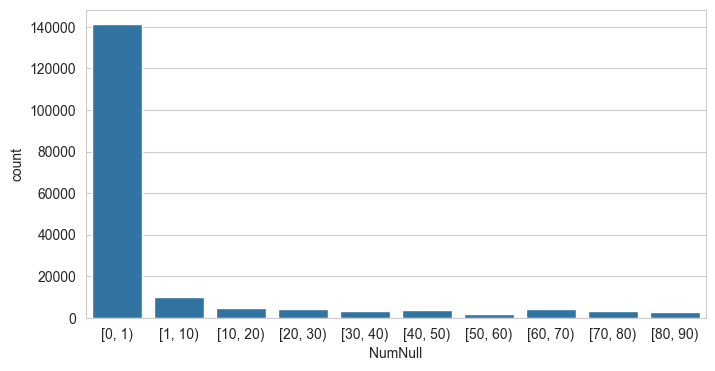

In [7]:
cons = aguah.iloc[0:, 5:]
cons['NumNull'] = cons.isnull().sum(axis=1)
print('Proporción de valores distintos de NaN : {:.2f}%'.format(len(cons[cons.NumNull==0])/len(cons)*100))
bins = [0,1,10,20,30,40,50,60,70,80,90]
cut = pd.cut(cons.NumNull, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)
plt.show()

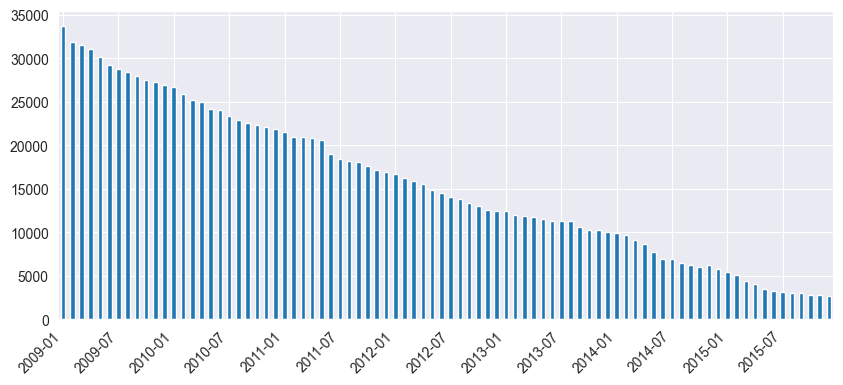

In [8]:
NumNullwithTime = cons.drop('NumNull', axis=1).isnull().sum()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
pbar = NumNullwithTime.plot.bar()
plt.xticks(list(range(0,len(NumNullwithTime.index),6)), list(NumNullwithTime.index[0::6]), rotation=45, ha='right')
plt.show()

### Imputación de datos faltantes


* **Intento con SimpleImputer**

In [9]:
from sklearn.impute import SimpleImputer

In [10]:

data = aguah.iloc[0:, 5:]

imputer = SimpleImputer(strategy='mean')

imputed_array = imputer.fit_transform(data)


df_imputed = pd.DataFrame(imputed_array, columns=data.columns)


df_imputed.to_csv('datos_imputados.csv', index=False)
print('Proceso de Imputación terminado')

Proceso de Imputación terminado


## Análisis de los datos Imputados

Con los datos imputados, graficamos el consumo con respecto al tiempo.

* **Serie de tiempo**

In [11]:
df_datos_imputados = pd.read_csv('./datos_imputados.csv')

In [12]:
df_long = df_datos_imputados.melt(var_name='Fecha', value_name='Consumo')
df_long = df_long.groupby('Fecha')['Consumo'].sum().reset_index()
df_consumo_total = df_long.copy()
df_consumo_total['Fecha'] = pd.to_datetime(df_consumo_total['Fecha'])
df_consumo_total

,Fecha,Consumo
0,2009-01-01,1.156379e+07
1,2009-02-01,8.550169e+06
2,2009-03-01,6.758467e+06
3,2009-04-01,7.445560e+06
4,2009-05-01,8.257061e+06
...,...,...
79,2015-08-01,1.810500e+07
80,2015-09-01,1.986351e+07
81,2015-10-01,1.109785e+07
82,2015-11-01,1.541973e+07


<Axes: title={'center': 'Serie de Consumo Total por Fecha'}, xlabel='Fecha'>

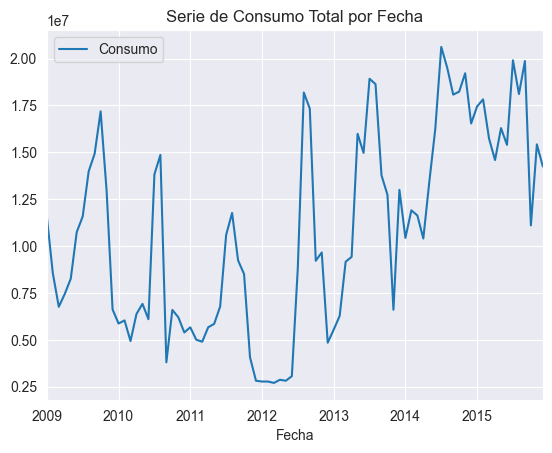

In [13]:
df_temp = df_consumo_total.copy().set_index('Fecha')
df_temp.plot(title="Serie de Consumo Total por Fecha")


El consumo de agua aumenta con el paso del tiempo del 2009 al 2015 el consumo muestra una tendencia ascendente, aunque también se presentan caidas en periodos intermedios.
Un aspecto importante a considerar es la variabilidad, algunos periodos muestra caídas muy bruscas y repidaente se recuperan, siendo una muy clara muestra que el consumo no es constante si no que fluctua


In [14]:
df_estadisticas = df_consumo_total.copy()
df_estadisticas['Año'] = df_estadisticas['Fecha'].dt.year
df_estadisticas

,Fecha,Consumo,Año
0,2009-01-01,1.156379e+07,2009
1,2009-02-01,8.550169e+06,2009
2,2009-03-01,6.758467e+06,2009
3,2009-04-01,7.445560e+06,2009
4,2009-05-01,8.257061e+06,2009
...,...,...,...
79,2015-08-01,1.810500e+07,2015
80,2015-09-01,1.986351e+07,2015
81,2015-10-01,1.109785e+07,2015
82,2015-11-01,1.541973e+07,2015


In [15]:
estadisticas = df_estadisticas.groupby('Año')['Consumo'].agg([
    'mean',       # media
    'std',        # desviación estándar
    'var',        # varianza
])
display(estadisticas)

,mean,std,var
Año,,,
2009,1.087858e+07,3.440619e+06,1.183786e+13
2010,7.240108e+06,3.423263e+06,1.171873e+13
2011,6.734933e+06,2.721587e+06,7.407035e+12
2012,7.089517e+06,5.690111e+06,3.237737e+13
2013,1.208259e+07,4.666698e+06,2.177807e+13
2014,1.551782e+07,3.761495e+06,1.414884e+13
2015,1.632464e+07,2.499876e+06,6.249378e+12


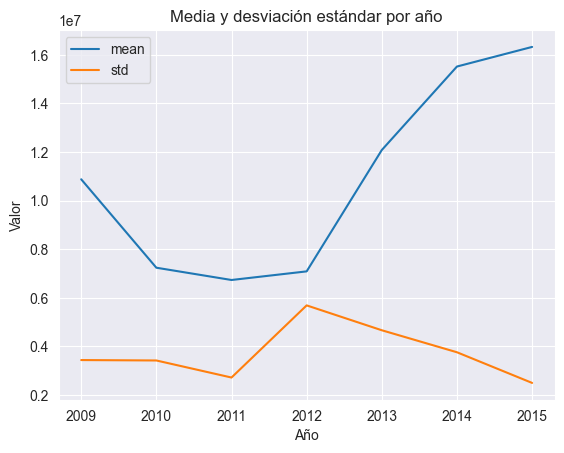

In [16]:
estadisticas[['mean', 'std']].plot(title='Media y desviación estándar por año')
plt.ylabel("Valor")
plt.grid(True)
plt.show()

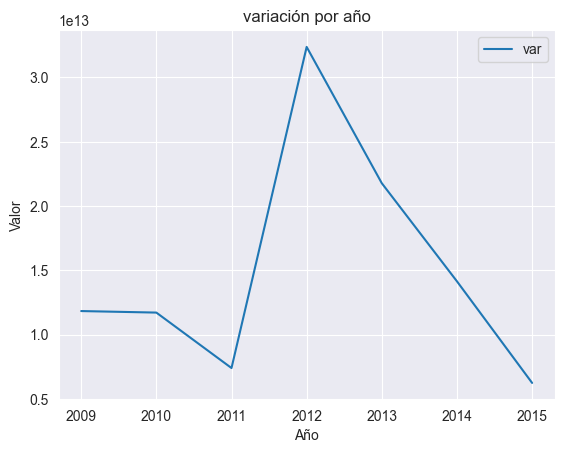

In [17]:
estadisticas[['var']].plot(title='variación por año')
plt.ylabel("Valor")
plt.grid(True)
plt.show()

## Modelamiento con método Box-Jenkins

In [18]:
df_consumo_total.to_csv("consumo_total.csv", index = True)

In [65]:
def diferenciar(serie):
    df_diferenciado = serie.copy()
    df_diferenciado["Consumo"] = serie["Consumo"].diff(periods=12)
    df_diferenciado = df_diferenciado.dropna().reset_index(drop=True)
    return df_diferenciado

def graficar(serie):
    df_temp = serie.copy().set_index('Fecha')
    df_temp.plot()

def estadisticas(serie):
    df_estadisticas = serie.copy()
    df_estadisticas['Año'] = df_estadisticas['Fecha'].dt.year
    estadisticas = df_estadisticas.groupby('Año')['Consumo'].agg([
    'mean',       # media
    'std',        # desviación estándar
    ])
    display(estadisticas)
    estadisticas[['mean', 'std']].plot(title='Media y desviación estándar por año')
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()

def periodograma(serie):
    temp = serie["Consumo"]
    valores = temp.values
    n = len(valores)

    frecuencias = np.fft.fftfreq(n, d=1)  
    espectro = np.fft.fft(valores)
    potencia = np.abs(espectro) ** 2

    positivas = frecuencias > 0

    plt.plot(frecuencias[positivas], potencia[positivas])
    plt.title("Espectro de Potencia (FFT)")
    plt.xlabel("Frecuencia (ciclos por unidad de tiempo)")
    plt.ylabel("Potencia")
    plt.grid(True)
    plt.show()

,mean,std
Año,,
2010,-3.638467e+06,4.226952e+06
2011,-5.051747e+05,2.422779e+06
2012,3.545837e+05,4.190626e+06
2013,4.993074e+06,5.417568e+06
2014,3.435232e+06,3.734900e+06
2015,8.068184e+05,4.219539e+06


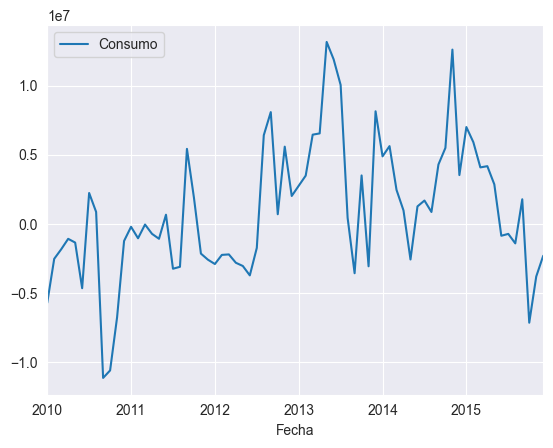

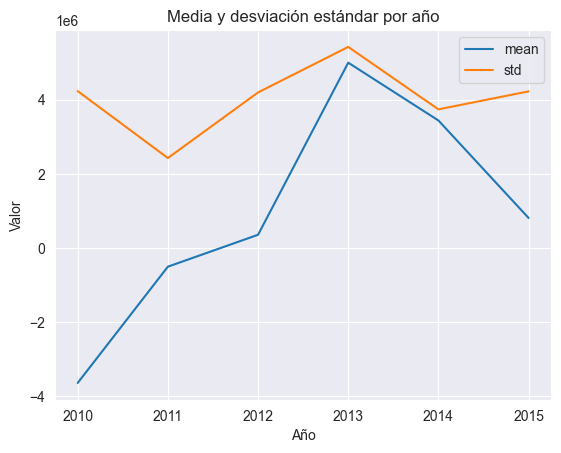

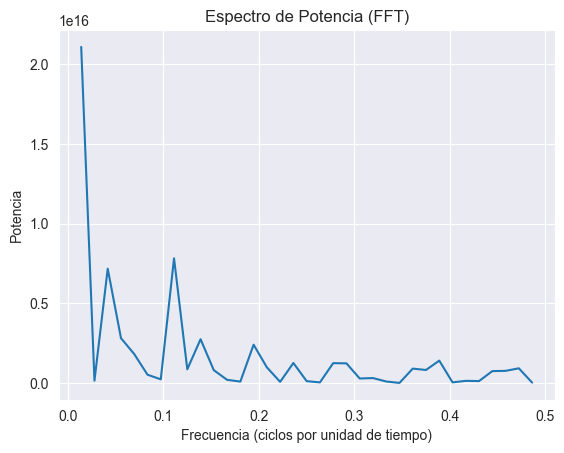

In [63]:
df_dif_1 = diferenciar(df_consumo_total)
graficar(df_dif_1)
estadisticas(df_dif_1)
periodograma(df_dif_1)

,mean,std
Año,,
2010,-3.638467e+06,4.226952e+06
2011,-5.051747e+05,2.422779e+06
2012,3.545837e+05,4.190626e+06
2013,4.993074e+06,5.417568e+06
2014,3.435232e+06,3.734900e+06
2015,8.068184e+05,4.219539e+06


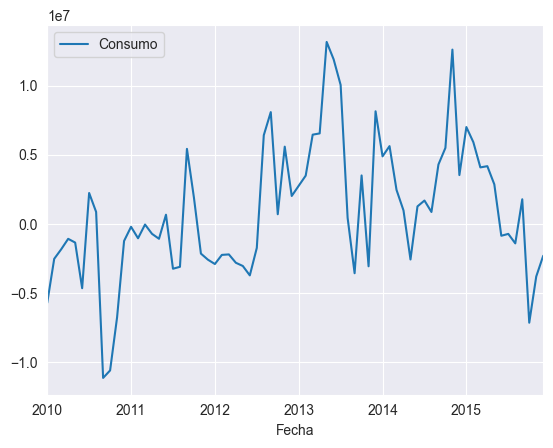

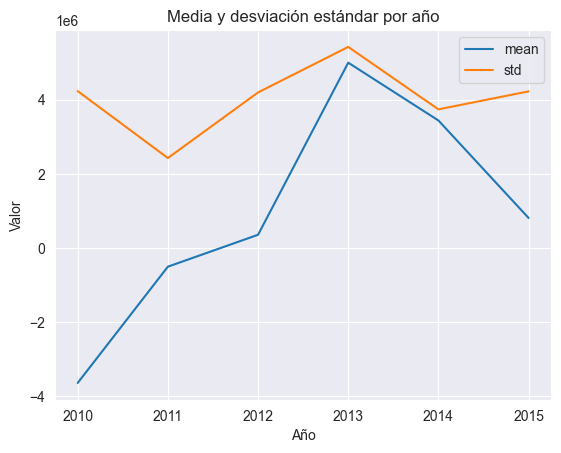

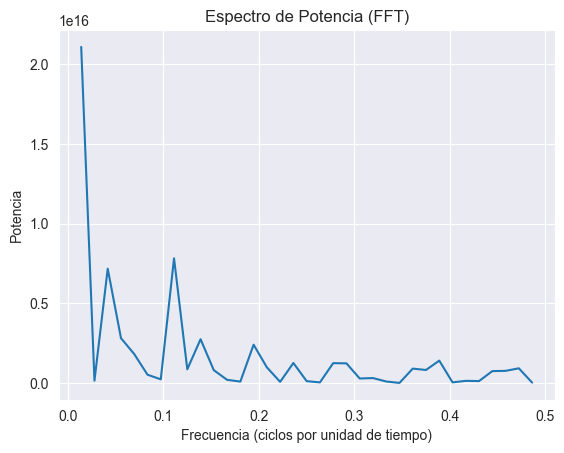

In [64]:
df_dif_2 = diferenciar(df_dif_1)
df_dif_2 = diferenciar(df_consumo_total)
graficar(df_dif_2)
estadisticas(df_dif_2)
periodograma(df_dif_2)

---

## Función de autocorrelación estimada

$$
r_k
=
\frac{\sum^T_{t = 1} (x_t - \hat{x}) (x_{t-k} - \hat{x})}{\sum^T_{t = 1} (x_t - \hat{x})^2}
$$

In [32]:
def numerador_rk(serie, promedio,k):
    T = len(serie)
    suma = 0
    
    for t in range(k+1, T):
        suma += (serie[t] - promedio) * (serie[t - k] - promedio)
    return suma


def denominador_rk(serie, promedio):
    T = len(serie)
    suma = 0

    for t in range(1, T):
        suma += (serie[t] - promedio)**2
    return suma

In [33]:
def coeficientes_rk(serie):
    promedio = serie["Consumo"].sum() / len(serie)
    
    denominador = denominador_rk(serie["Consumo"].values, promedio)

    r = np.empty(12, dtype=float)
    for k in range (0 ,12):
        numerador = numerador_rk(serie["Consumo"].values, promedio, k)
        r[k] = numerador/denominador
    return r


In [34]:
rk = coeficientes_rk(df_dif_1)
print(rk)


[1.         0.60824934 0.41824458 0.2611168  0.19906205 0.16781356
 0.18117224 0.21018566 0.19724238 0.16265622 0.09766674 0.00538395]


$$
r_k 
=
\left(
\begin{array}{c}
1\\
0.60824934 \\
0.41824458 \\
0.2611168  \\
0.19906205 \\
0.16781356\\
0.18117224 \\
0.21018566 \\
0.19724238 \\
0.16265622 \\
0.09766674 \\
0.00538395\\
\end{array}
\right)
$$

C:\Users\Sachistein\AppData\Local\Temp\ipykernel_5620\3034186976.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


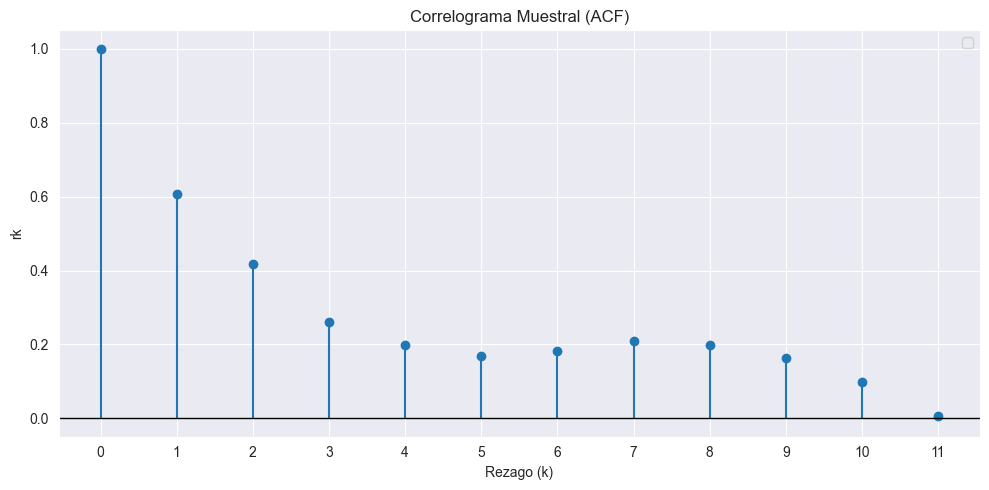

In [35]:
n = 72
k_vals = np.arange(len(rk))  # Rezagos de 0 a 11

plt.figure(figsize=(10, 5))
plt.stem(k_vals, rk, basefmt=" ")
plt.axhline(0, color='black', linewidth=1)
plt.title("Correlograma Muestral (ACF)")
plt.xlabel("Rezago (k)")
plt.ylabel("rk")
plt.xticks(k_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

### Función de autocorrelación parcial estimada

Primer término de la autocorrelación parcial denotado por $\phi_1$ puede estimarse transformando la serie $x_t$ en desviaciones respecto a su medio muestral 
$$
y_t = x_t - \hat{x}
$$
y a continuación estimando una regresión de $y_t$ sobre y $y_{t-1}$, la pendiente estimada de esta regresión es $\phi_1$

El primer valor de la función de autocorrelación parcial $\phi_1$ es igual al primer valor de autocorrelación $r_1$, propiedad de las funciones de autocorrelación de todo proceso estocástico
estacionario.

$$
y_t
=
\phi_1 y_{t-1} +
\phi_2 y_{t-2} +
\phi_3 y_{t-3} + \dots
\phi_k y_{t-k} + u_t
$$

---

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

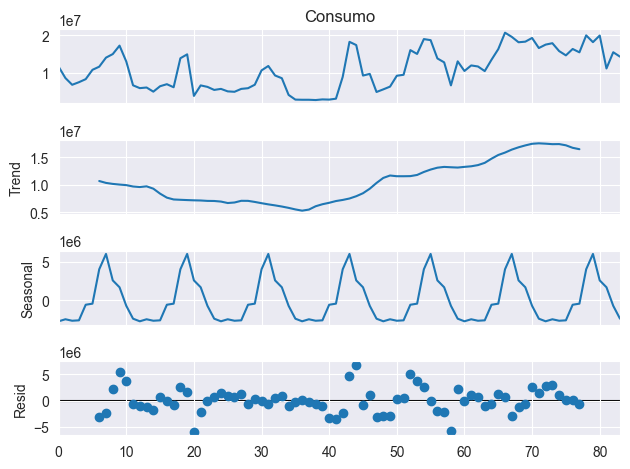

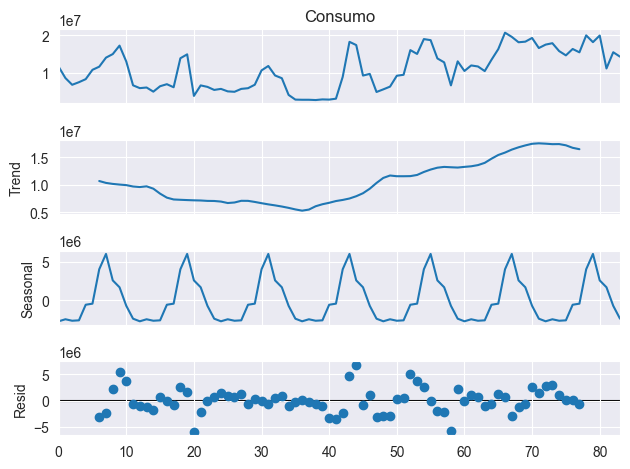

In [75]:
result = seasonal_decompose(df_consumo_total['Consumo'], model='additive', period=12)
result.plot()

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
model = ARIMA(df_consumo_total['Consumo'], order=(1,0,0))
result = model.fit()

In [77]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                Consumo   No. Observations:                   84
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1375.969
Date:                Sun, 20 Jul 2025   AIC                           2757.939
Time:                        22:24:30   BIC                           2765.231
Sample:                             0   HQIC                          2760.870
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e+07   1.76e+06      6.156      0.000    7.39e+06    1.43e+07
ar.L1          0.7974      0.075     10.620      0.000       0.650       0.945
sigma2      9.892e+12      0.175   5.64e+13      0.0

In [78]:
pronostico = result.forecast(steps=12)
print(pronostico)

84    1.355216e+07
85    1.300233e+07
86    1.256390e+07
87    1.221429e+07
88    1.193552e+07
89    1.171322e+07
90    1.153596e+07
91    1.139462e+07
92    1.128191e+07
93    1.119204e+07
94    1.112037e+07
95    1.106323e+07
Name: predicted_mean, dtype: float64


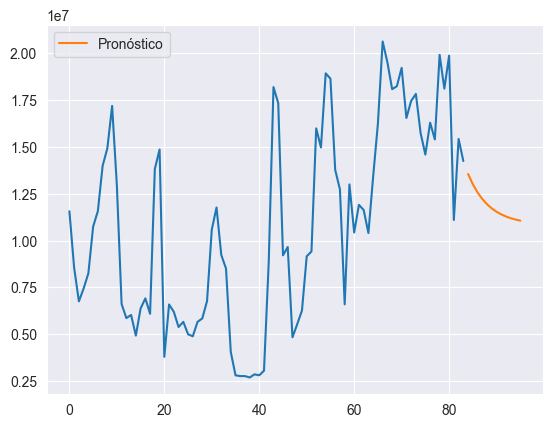

In [79]:
df_consumo_total['Consumo'].plot(label='Histórico')
pronostico.plot(label='Pronóstico', legend=True)
plt.show()